In [8]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
#Data import and Data Cleaning
dataset = pd.read_csv("Mall_Customers.csv")

# Standardize column names to avoid errors with inconsistent naming
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(" ", "_")
print("=== Initial Dataset Preview ===")
print(dataset.head(), "\n")
rows, cols = dataset.shape
print(f"Dataset shape: {rows} rows, {cols} columns")
print("Columns:", list(dataset.columns), "\n")

# Drop irrelevant columns if they exist
to_drop = [c for c in ["customerid", "gender", "age"] if c in dataset.columns]
if to_drop:
    print(f"Dropping columns: {to_drop}")
    dataset = dataset.drop(columns=to_drop)

#drop missing values from the rows

dataset = dataset.dropna()

=== Initial Dataset Preview ===
   customerid  gender  age  annual_income_(k$)  spending_score_(1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Dataset shape: 200 rows, 5 columns
Columns: ['customerid', 'gender', 'age', 'annual_income_(k$)', 'spending_score_(1-100)'] 

Dropping columns: ['customerid', 'gender', 'age']


In [5]:
#Applying KMeans Clustering ALgorithm
x = dataset[["annual_income_(k$)","spending_score_(1-100)"]]
kmeans = KMeans(n_clusters = 5 , random_state = 0)
kmeans.fit(x)
print(kmeans.labels_)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [6]:
dataset['cluster'] = kmeans.labels_
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


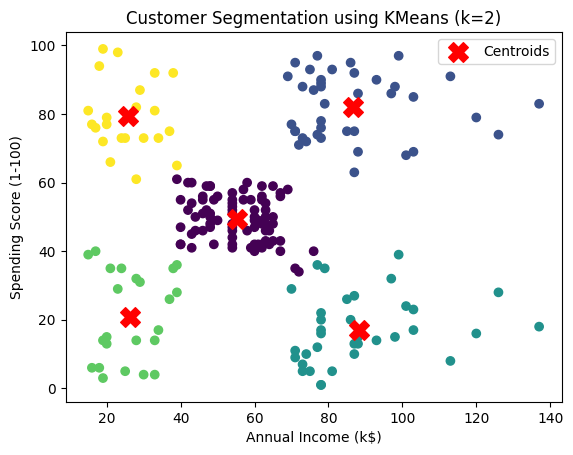

In [7]:
plt.scatter(x["annual_income_(k$)"], x["spending_score_(1-100)"], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using KMeans (k=2)")
plt.legend()
plt.show()

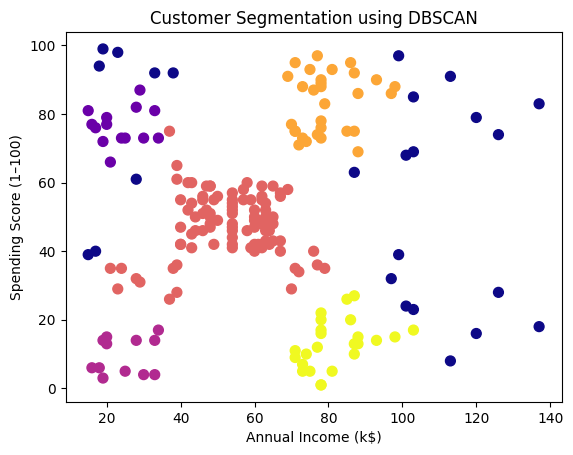

In [18]:
#For DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Selecting the same features
x = dataset[["annual_income_(k$)", "spending_score_(1-100)"]]

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Apply DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=8)
dbscan.fit(x_scaled)

# Assign labels
dataset['dbscan_cluster'] = dbscan.labels_
plt.scatter(x["annual_income_(k$)"], x["spending_score_(1-100)"],
            c=dataset['dbscan_cluster'], cmap='plasma', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation using DBSCAN")
plt.show()


In [37]:
# Average spending per cluster
print("Average Spending Per cluster\n")
kmeans_avg = dataset.groupby('cluster')[['annual_income_(k$)', 'spending_score_(1-100)']].mean()
print("\t\t\tKMeans\n\n",kmeans_avg)

dbscan_avg = dataset.groupby('dbscan_cluster')[['annual_income_(k$)', 'spending_score_(1-100)']].mean()
print("\n\t\t\tDBScan\n\n",dbscan_avg)


Average Spending Per cluster

			KMeans

          annual_income_(k$)  spending_score_(1-100)
cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 88.200000               17.114286
3                 26.304348               20.913043
4                 25.727273               79.363636

			DBScan

                 annual_income_(k$)  spending_score_(1-100)
dbscan_cluster                                            
-1                       83.040000               60.480000
 0                       23.642857               76.428571
 1                       24.583333                9.583333
 2                       53.252632               47.768421
 3                       79.533333               83.133333
 4                       81.875000               12.958333
